# Lab 6 Community Detection
## Due: Midnight, November 4
In this lab, we will learn
1. **CPM community detection**
2. **Spectral Clustering based Community Detection (normalized cut)**
3. **Modularity Maximization based Community Detection**
4. **Community Evalution**
5. **Visualization (Optional)**


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save” or press Ctrl+S.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download .ipynb”
- After download is complete, Click on File, Select “Print”, and and Choose ``Save as PDF''
- Submit both the Notebook file and the PDF File as your submission for Lab 6

# 1. Preparation

## 1.1 Import the packages

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities
from sklearn.cluster import SpectralClustering
from networkx.algorithms.community import greedy_modularity_communities

## 1.2. Load Graph Data
Please download the file **football.gml** from Canvas and upload to DS420 folder in Google Drive. It contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. Each node is a football team. The link between two nodes means that the two teams played at least one game. The nodes have values that indicate to which conferences they belong, which are used as the groundtruth of the communities.  The values are as follows:
- 0 = Atlantic Coast
- 1 = Big East
- 2 = Big Ten
- 3 = Big Twelve
- 4 = Conference USA
- 5 = Independents
- 6 = Mid-American
- 7 = Mountain West
- 8 = Pacific Ten
- 9 = Southeastern
- 10 = Sun Belt
- 11 = Western Athletic

We will try to detect commnities/conferences of each node based on the network.

In [ ]:
# The following code will mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


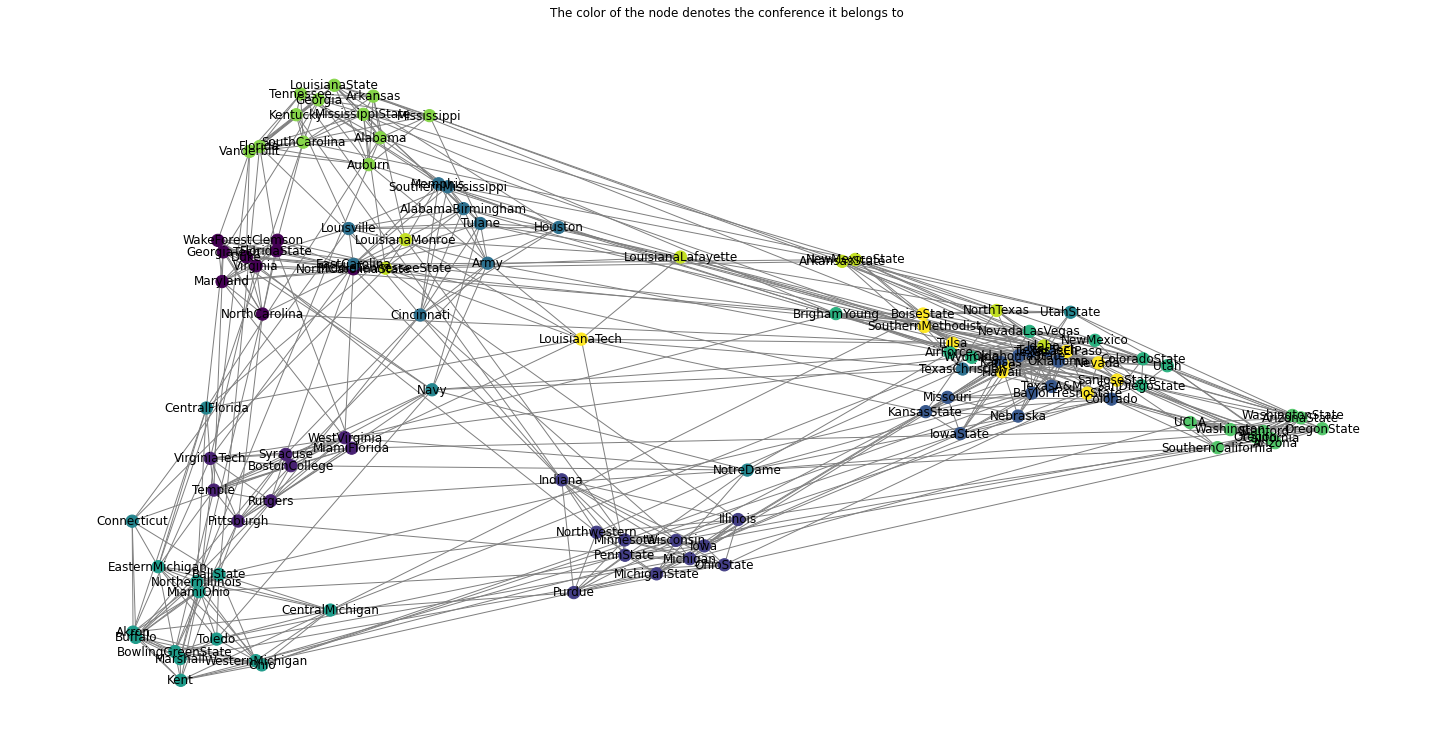

In [ ]:
# The color of the node denotes the conference it belongs to
%matplotlib inline
G = nx.read_gml(path='/content/gdrive/My Drive/DS420/football.gml', label='label', destringizer=None)
plt.figure(1, figsize=(20,10))
pos = nx.spectral_layout(G, scale=50)
node_community_id = [int(node[1]) for node in G.nodes('value')]
nx.draw(G, pos, font_size=12, edge_color='gray', node_size=150, node_color=node_community_id, with_labels=True)
plt.title('The color of the node denotes the conference it belongs to')
plt.show()

# 2. CPM for Community Detection
We will use the networkx implementation of CPM method for community detection, i.e., k_clique_communities(G, k, cliques=None), where 

- **G** is the graph
- **k** is the clique of size k we will find before constructing the clique graph. 

For more details, please refer to: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html#networkx.algorithms.community.kclique.k_clique_communities 

## <font color='green'>Exercise 1</font>
Please call the k_cique_communities with k=3 to find communities for the graph in Section 1. An example of calling k_clique_communities can be found in https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html#networkx.algorithms.community.kclique.k_clique_communities 

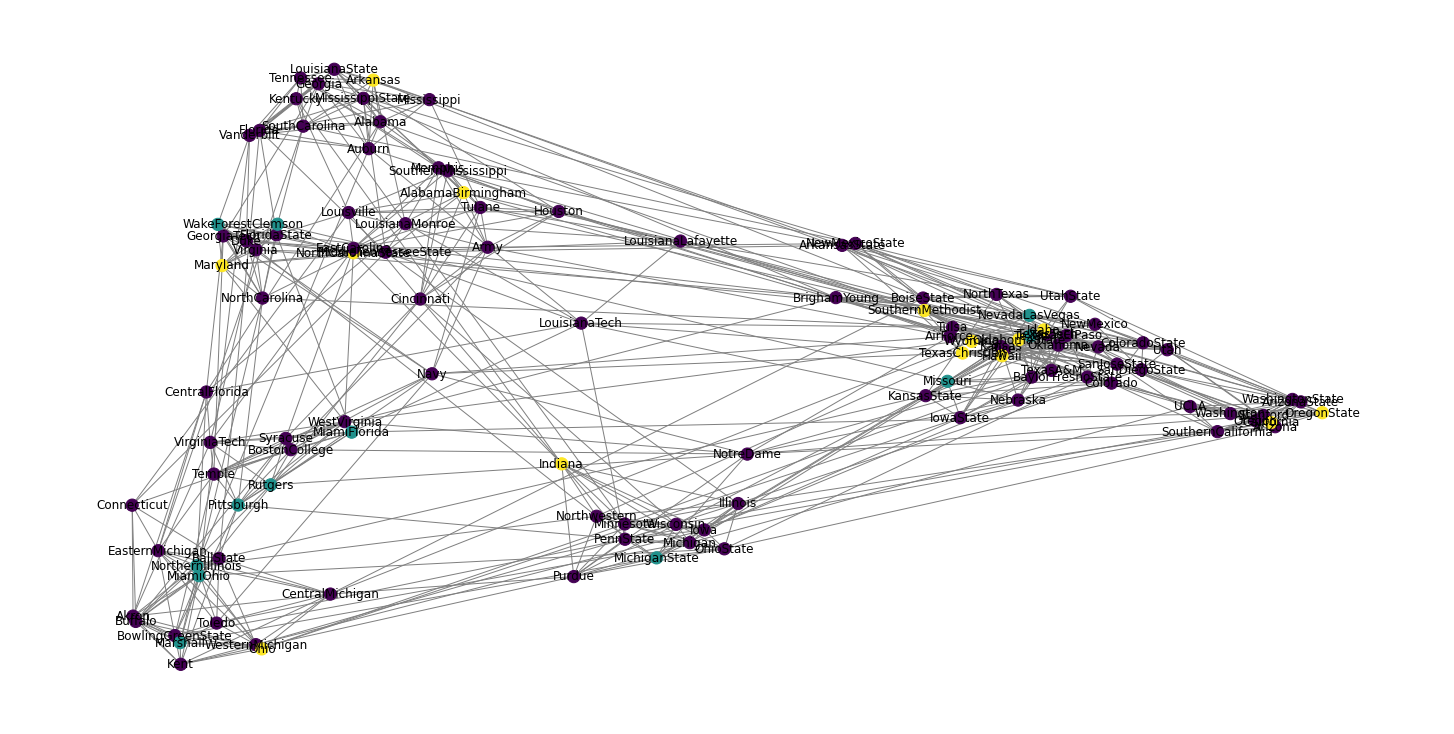

In [ ]:
# TODO: Please fill in the missing codes
communities = list(k_clique_communities(G=?????, k=????????))

partitions = {}
id = 0
for community in communities:
    for node in community:
        partitions[node] = id
    id += 1
for node in G.nodes():
    if node not in partitions:
        partitions[node] = id
plt.figure(2, figsize=(20,10))
nx.draw(G, pos, node_color=list(partitions.values()), font_size=12, edge_color='gray', node_size=150, with_labels=True)
plt.show(block=True)

## <font color='green'>Exercise 2</font>
Compared with the graoundtruth shown in Section 1, CPM with k=3 doesn't give very good perforamnce, i.e., most of the nodes are put into one community. Now please vary K to detect better communities.

In [ ]:
# TODO: Please vary K to detect better communities ????????????

# 3. Sepctral Clustering based Community Detection 
The ratio cut and normalized cut can be reformulated as spectral clustering by solving the following optimization problem
\begin{equation}
    \min_{\mathbf{X}} Tr(\mathbf{X}^T \mathbf{L} \mathbf{X}) \quad s.t. \quad \mathbf{X}^T \mathbf{X} = \mathbf{I}
\end{equation}
where for ratio cut
\begin{equation}
    \mathbf{L} = \mathbf{D} - \mathbf{A}
\end{equation}
and for normalized cut
\begin{equation}
    \mathbf{L} = \mathbf{I} - \mathbf{D}^{-1/2}\mathbf{A}\mathbf{D}^{-1/2}
\end{equation}

We can call the SpectralClustering of sklearn with the affinity matrix as the adjaency matrix of the graph to do community detection. **SpectralClustering** applies clustering to a projection of the normalized Laplacian. In SpectralClustering(n_clusters=8, eigen_solver=None, n_components=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None), we need to specify n_clusters as the number of communities we want to have and set affinity='precomputed'. For more details, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

## <font color='green'>Exercise 3</font>
Please finish the following code for SpectralClustering based community detection

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


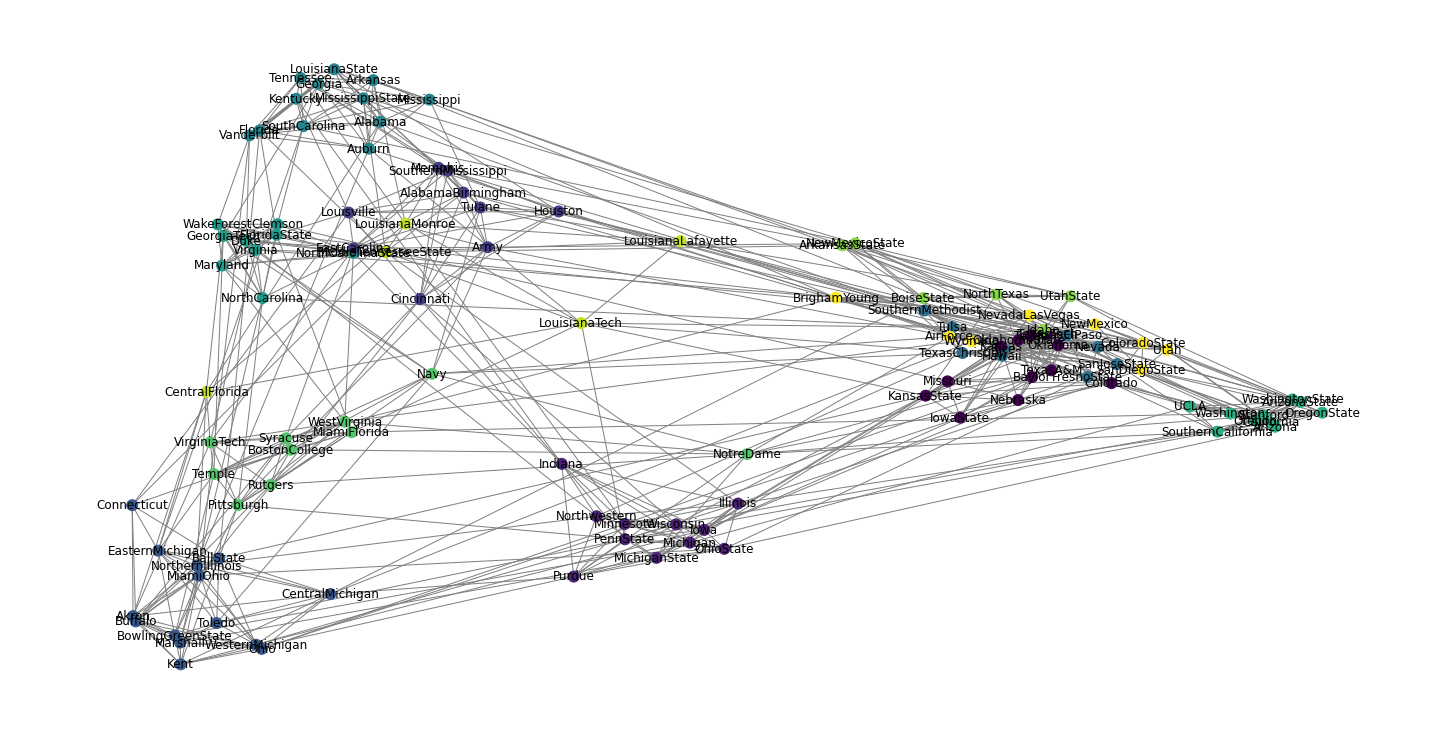

In [ ]:
from networkx.convert_matrix import to_numpy_matrix
# Get adjacency-matrix as numpy-array, please call nx.to_numpy_matrix to get the adjeancy matrix of graph G. 
# An example of the function can be found here: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.to_numpy_matrix.html
adj_mat = ?????????

# Spectral Clustering
sc = SpectralClustering(n_clusters=12, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

plt.figure(3, figsize=(20,10))
nx.draw(G, pos, font_size=12, edge_color='gray', node_size=120, node_color=sc.labels_, with_labels=True)
plt.show()

# 4. Modularity based Community Detection
We will use the greedy_modularity_communities(G, n_communities) of networkx for modularity based community detection, where

- **G**: NetworkX graph
- **n_communities**: int or None, optional (default=None)


Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists. For more details, please refer to: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html

## <font color='green'>Exercise 4</font>
Please finish the following code for modularity based community detection. Please call greedy_modularity_communities to find communities

In [ ]:
# TODO: please call greedy_modularity_communities with n_communities=12 to find communities
communities = list(???????????????????????)
partitions = {}
id = 0
for community in communities:
    for node in community:
        partitions[node] = id
    id += 1
for node in G.nodes():
    if node not in partitions:
        partitions[node] = id
plt.figure(4, figsize=(20,10))
nx.draw(G, pos, node_color=list(partitions.values()), font_size=12, edge_color='gray', node_size=120, with_labels=True)
plt.show(block=True)

# <font color='green'>Exercise 5</font>
Please download the **karate_club.edgelist** from Canvas, upload it to DS420 in Google Drive. Use CPM method to detect communities and visualize it. Each line of the kara_club.edgelist is an edge of the format "source_node target_node". The first 5 lines are shown below for your reference:

0 1

0 2

0 3

0 4

0 5

Note that the file doesn't contain the groundtruth of the nodes. Please don't try to use the code in Section 1.2 to load the graph.

You can refer to lab 4 and 5 to find code for importing edgelist to NetworkX. The function you will use is **read_edgelist**. For more details of read_edgelist, please refer to: https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html

In [ ]:
# TODO: Use CPM method to detect communities and visualize it


# 5. Community Detection: Evalaution without Groundtruth
In real-world, we are interested in detecting implicit communities based on the network strcure. Thus, we oftern need to evalaute the quality of detected communities wihtout groundtruh. We will mainly introduce three ways to measure quality of communities without graoundtruth, i.e., coverage, performance and modularity.

The goal of community detection is to detect communities that are densely connected within each community and sparsely connected between communities. Thus, one natrual idea to evalaute the quality of communities is measuring the number of edges within each community and number of edges between communities, which is the basic idea of coverage and performance. Specifically, let $(P_1, P_2, \dots, P_K)$ be $K$ communities of the graph $G$. Coverage is defined as follows

**Coverage**: The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph
\begin{equation}
  Coverage = \frac{\sum_{k=1}^K|E_k|}{|E|}
\end{equation}
where $|E|$ is the total number of edges in the graph and $|E|_k$ is the number of intra-community edges in community $P_k$

**Performance**: The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.
\begin{equation}
  Performance = \frac{\sum_{k=1}^{K} (|E_k|) + \sum_{i=1}^{K-1}\sum_{j=i+1}^{K} (N_i \times N_j - S_{ij})}{N \times (N-1)/2 }
\end{equation}
where $N_i$ is number of nodes in $P_i$ and $S_{ij}$ is the inter-community edges between $P_i$ and $P_j$. Thus, $N_i \times N_j - S_{ij}$ gives the number of non-edges between $P-i$ and $P_j$. $N$ is the total number of nodes in graph $G$.

Modualrity defines how distant the detected communities are to the random graph. A larger modularity means the communities are more distant from the random graph and are more strucrued. Thus, modualrity is also used for measureing the quality of detected communitites. It is defined as

**Modularity**: Modularity gives the distance of communities to the random graph as
\begin{equation}
  Q = \frac{1}{2\times |E|} \sum_{k=1}^K \sum_{i,j \in P_{k}} (A_{ij} - \frac{d_i \cdot d_j}{2|E|})
\end{equation}


For coverage, performance and modualrity, the **larger** these scores are, the **better** the detected communitites.

## 5.1 Coverage and Perforamnce
We can call **networkx.algorithms.community.partition_quality(G, partition)**, which returns
the coverage and performance of a partition of G. 

- **G**: NetworkX graph
- **partition**: Partition of the nodes of G, represented as a sequence of sets of nodes (blocks). Each block of the partition represents a community.

For more details, pelase refer to: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html#networkx.algorithms.community.quality.partition_quality

## <font color='green'>Exercise 6</font>
Please use greedy_modularity_communities with n_communities=12 to detect communities and calculate the coverage and performance

In [ ]:
from networkx.algorithms.community import partition_quality

partitions = greedy_modularity_communities(G=??????, n_communities=????????)
coverage, performance = partition_quality(G=????????, partition=???????)
print(coverage)
print(performance)

0.6900489396411092
0.8652936689549962


## 5.2 Modualrity
We can call **modularity(G, communities, weight='weight', resolution=1)** to calculate the modularity of detected communities, where 

- **G**: NetworkX Graph
- **communities**: list or iterable of set of nodes

For more details, please refer to: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html#networkx.algorithms.community.quality.modularity 

## <font color='green'>Exercise 7</font>
Please use greedy_modularity_communities with n_communities=12 to detect communities and calculate the modularity

In [ ]:
from networkx.algorithms.community import modularity
partitions = greedy_modularity_communities(G=????????, n_communities=????????)
print(modularity(G=?????????, communities=???????))

0.5140086063512422


<br>
<br>
<br>
<br>

# 6. Visualizing Large Graph with Detected Communities (**Optional, No exercises**)
Sometimes, we might want to visualize large graphs with the detected communitites. One trick to do this is by setting the node size as 0. Following gives an example for doing this. To run the code, please download **facebook_combined.txt** and upload to DS420.

In [ ]:
# load the graph
G_social = nx.read_edgelist(path='/content/gdrive/My Drive/DS420/facebook_combined.txt')
print(G_social.number_of_nodes())
print(G_social.number_of_edges())

4039
88234


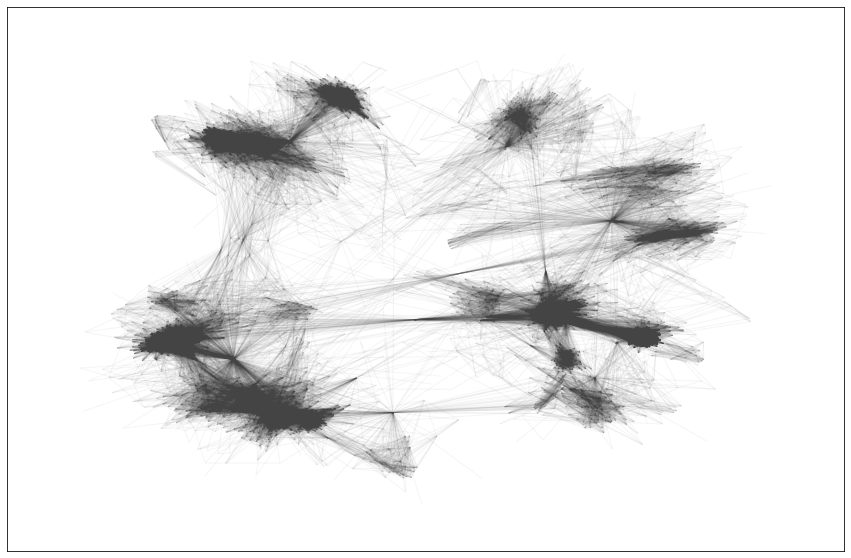

In [ ]:
# visualize the graph before community detection. It might take few minutes. Please be patient.
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social,
    pos=pos,
    node_size=0,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)

In [ ]:
# use greedy_modularity_communities to detect communities. It might take few minutes
from networkx.algorithms.community import greedy_modularity_communities
communities = sorted(greedy_modularity_communities(G_social), key=len, reverse=True)

In [ ]:
# utility functions for visualization
def set_node_community(G, communities):
  '''Add community to node attributes'''
  for c, v_c in enumerate(communities):
    for v in v_c:
      # Add 1 to save 0 for external edges
      G.nodes[v]['community'] = c + 1

def set_edge_community(G):
  '''Find internal edges and add their community to their attributes'''
  for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
      # Internal edge, mark with community
      G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
      # External edge, mark as 0
      G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
  '''Assign a color to a vertex.'''
  r0, g0, b0 = 0, 0, 0
  n = 16
  low, high = 0.1, 0.9
  span = high - low
  r = low + span * (((i + r_off) * 3) % n) / (n - 1)
  g = low + span * (((i + g_off) * 5) % n) / (n - 1)
  b = low + span * (((i + b_off) * 7) % n) / (n - 1)
  return (r, g, b)

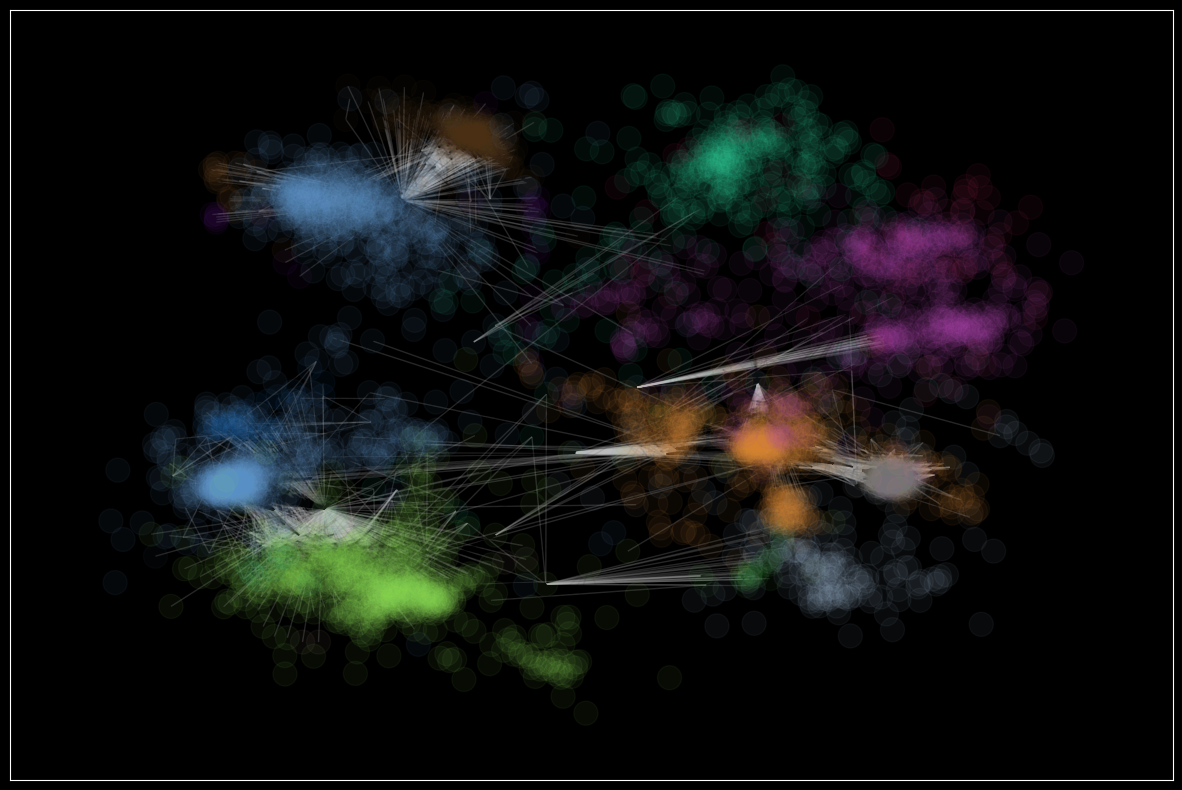

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]

# external edges
nx.draw_networkx(
    G_social,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)

# internal edges
nx.draw_networkx(
    G_social, pos=pos,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05,
    with_labels=False)